In [1]:
import pandas as pd
df = pd.read_csv('digital_payments.csv')
# Each row: 'Mode', yearly volume columns

In [2]:
from sklearn.linear_model import LinearRegression
import numpy as np

def predict_next_year(row):
    years = np.arange(len(row)-1).reshape(-1,1)  # e.g. [0,1,2,...]
    vals = row[1:].values.astype(float)          # skip 'Mode'
    X = years
    y = vals
    model = LinearRegression()
    model.fit(X, y)
    next_year = np.array([[len(years)]])
    pred = model.predict(next_year)[0]
    return pred

df['2026-2027_pred'] = df.apply(predict_next_year, axis=1)
print(df[['Mode', '2026-2027_pred']])


                  Mode  2026-2027_pred
0             BHIM UPI    17674.055191
1                  PPI      773.695314
2           Debit Card      100.053247
3                 NACH      987.874786
4                 NEFT      767.740200
5               Others      596.488335
6          Credit Card      348.655617
7                 IMPS      558.325256
8                 AEPS        5.560246
9     Internet Banking       91.593745
10  Closed Loop Wallet      -19.962770
11      Mobile Banking       47.452303
12                NETC      449.223622
13                RTGS       25.963879
14        BHIM Aadhaar        2.021949
15                USSD        0.165791


In [4]:
df

,Mode,2018-2019,2019-2020,2020-2021,2021-2022,2022-2023,2023-2024,2024-2025,2025-2026,2026-2027_pred,2026-2027_arima
0,BHIM UPI,535.189557,1251.760697,2232.960834,4596.632249,8324.036609,13096.043865,18584.779566,10417.535870,17674.055191,13144.931482
1,PPI,460.434000,533.179000,493.903900,658.123900,746.674400,799.628466,844.873201,483.776710,773.695314,609.395490
2,Debit Card,441.782486,512.393200,411.485416,394.767800,341.947600,232.024332,210.321103,120.430440,100.053247,69.202370
3,NACH,286.138044,340.104290,362.619530,383.798048,463.163303,537.403621,1744.363425,343.989840,987.874786,751.098449
4,NEFT,231.886419,274.446700,309.279100,404.072800,528.474300,711.144264,809.159156,463.326750,767.740200,646.039882
5,Others,215.817968,555.643135,630.394733,753.422385,1103.203256,1526.227657,137.089547,23.192794,596.488335,585.341128
6,Credit Card,176.196387,217.728400,176.474619,223.988300,291.562200,353.663562,384.300361,220.051439,348.655617,312.143934
7,IMPS,175.290607,257.905625,327.834466,465.969766,521.076992,585.377700,569.238389,266.973572,558.325256,437.208765
8,AEPS,169.410747,88.606876,132.808607,126.877249,118.462484,86.130725,24.679400,1.586579,5.560246,4.773497
9,Internet Banking,151.752093,189.417624,203.933101,391.515546,302.411749,234.237206,33.400098,3.721754,91.593745,100.355051


digital transaction volumes often have nonlinear trends (exponential, logistic, piecewise), and negative predictions are not meaningful. Here’s how to address both concerns:

Model Selection
For non-linear growth and time series constraints:

Polynomial Regression: Captures curvilinear growth.

Exponential/Logarithmic Regression: If data spikes, fits better than a line.

Time Series Models: ARIMA, Exponential Smoothing, or Prophet handle seasonality, nonlinearity, and constraints.

Enforce Non-negativity: Clip predictions at zero.

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

df = pd.read_csv('digital_payments.csv')

def poly_predict(row, degree=2):
    vals = row[1:].values.astype(float)         # Exclude mode
    years = np.arange(len(vals)).reshape(-1, 1)
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(years)
    model = LinearRegression()
    model.fit(X_poly, vals)
    next_year_poly = poly.transform([[len(vals)]])
    pred = model.predict(next_year_poly)[0]
    return max(0, pred)   # No negatives

df['2026-2027_poly2_pred'] = df.apply(poly_predict, axis=1)
print(df[['Mode', '2026-2027_poly2_pred']])


                  Mode  2026-2027_poly2_pred
0             BHIM UPI          16416.489108
1                  PPI            513.243401
2           Debit Card             14.704903
3                 NACH            948.632526
4                 NEFT            609.355596
5               Others              0.000000
6          Credit Card            277.905305
7                 IMPS            223.336236
8                 AEPS              0.000000
9     Internet Banking              0.000000
10  Closed Loop Wallet              5.363861
11      Mobile Banking              0.000000
12                NETC            250.569576
13                RTGS             16.755043
14        BHIM Aadhaar              0.600614
15                USSD              0.104943


In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

# Load your data
df = pd.read_csv('digital_payments.csv')

# Models for prediction
def linear_predict(row):
    vals = row[1:].values.astype(float)
    X = np.arange(len(vals)).reshape(-1, 1)
    model = LinearRegression()
    model.fit(X, vals)
    pred = model.predict([[len(vals)]])[0]
    return max(0, pred)

def poly_predict(row, degree=2):
    vals = row[1:].values.astype(float)
    X = np.arange(len(vals)).reshape(-1, 1)
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, vals)
    pred_poly = poly.transform([[len(vals)]])
    pred = model.predict(pred_poly)[0]
    return max(0, pred)

# Apply predictions
df['2026_2027_linear'] = df.apply(linear_predict, axis=1)
df['2026_2027_poly'] = df.apply(poly_predict, axis=1)

# Save predictions to CSV
df.to_csv('digital_payments_predictions_26_27.csv', index=False)
print("Saved digital_payments_predictions_26_27.csv")


Saved digital_payments_predictions_26_27.csv


In [7]:
df

,Mode,2018-2019,2019-2020,2020-2021,2021-2022,2022-2023,2023-2024,2024-2025,2025-2026,2026_2027_linear,2026_2027_poly
0,BHIM UPI,535.189557,1251.760697,2232.960834,4596.632249,8324.036609,13096.043865,18584.779566,10417.535870,17674.055191,19123.275088
1,PPI,460.434000,533.179000,493.903900,658.123900,746.674400,799.628466,844.873201,483.776710,773.695314,632.532064
2,Debit Card,441.782486,512.393200,411.485416,394.767800,341.947600,232.024332,210.321103,120.430440,100.053247,0.000000
3,NACH,286.138044,340.104290,362.619530,383.798048,463.163303,537.403621,1744.363425,343.989840,987.874786,1057.308229
4,NEFT,231.886419,274.446700,309.279100,404.072800,528.474300,711.144264,809.159156,463.326750,767.740200,729.098578
5,Others,215.817968,555.643135,630.394733,753.422385,1103.203256,1526.227657,137.089547,23.192794,596.488335,0.000000
6,Credit Card,176.196387,217.728400,176.474619,223.988300,291.562200,353.663562,384.300361,220.051439,348.655617,322.190956
7,IMPS,175.290607,257.905625,327.834466,465.969766,521.076992,585.377700,569.238389,266.973572,558.325256,371.025213
8,AEPS,169.410747,88.606876,132.808607,126.877249,118.462484,86.130725,24.679400,1.586579,5.560246,0.000000
9,Internet Banking,151.752093,189.417624,203.933101,391.515546,302.411749,234.237206,33.400098,3.721754,91.593745,0.000000


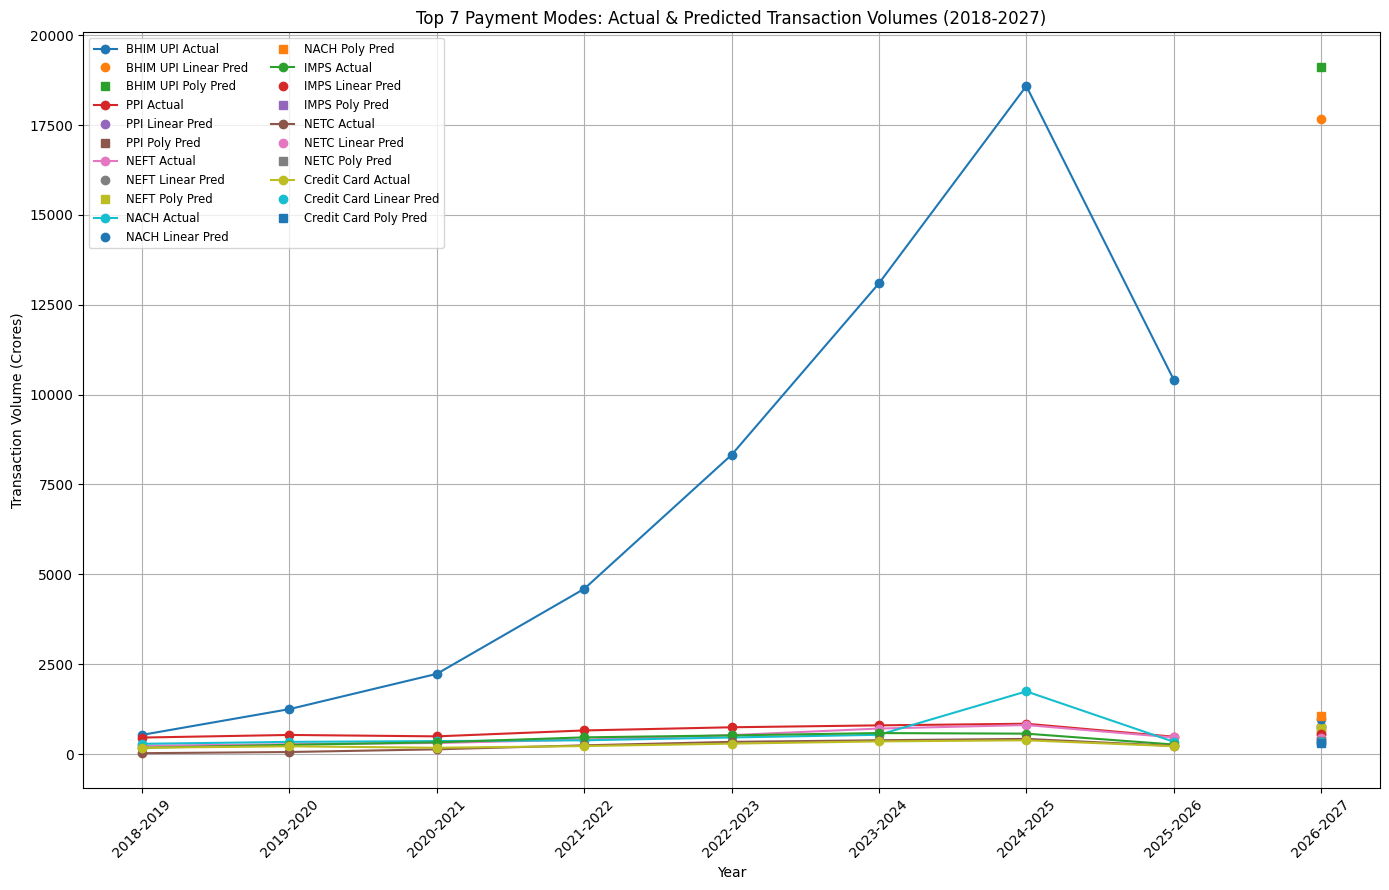

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data with predictions
df = pd.read_csv('digital_payments_predictions_26_27.csv')

# Sort by latest actual year (2025-2026) volume descending and pick top 7
top7 = df.sort_values(by='2025-2026', ascending=False).head(7)

# Years columns for plotting
years = ['2018-2019','2019-2020','2020-2021','2021-2022','2022-2023','2023-2024','2024-2025','2025-2026']

plt.figure(figsize=(14,9))

for _, row in top7.iterrows():
    mode = row['Mode']
    actual = row[years].values.astype(float)
    preds_linear = row['2026_2027_linear']
    preds_poly = row['2026_2027_poly']
    
    # Plot actual time series
    plt.plot(years, actual, marker='o', label=f'{mode} Actual')
    
    # Plot predictions for 2026-2027 as points after the last year
    plt.plot(['2026-2027'], [preds_linear], 'o', label=f'{mode} Linear Pred')
    plt.plot(['2026-2027'], [preds_poly], 's', label=f'{mode} Poly Pred')

plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Transaction Volume (Crores)')
plt.title('Top 7 Payment Modes: Actual & Predicted Transaction Volumes (2018-2027)')
plt.legend(loc='upper left', fontsize='small', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()


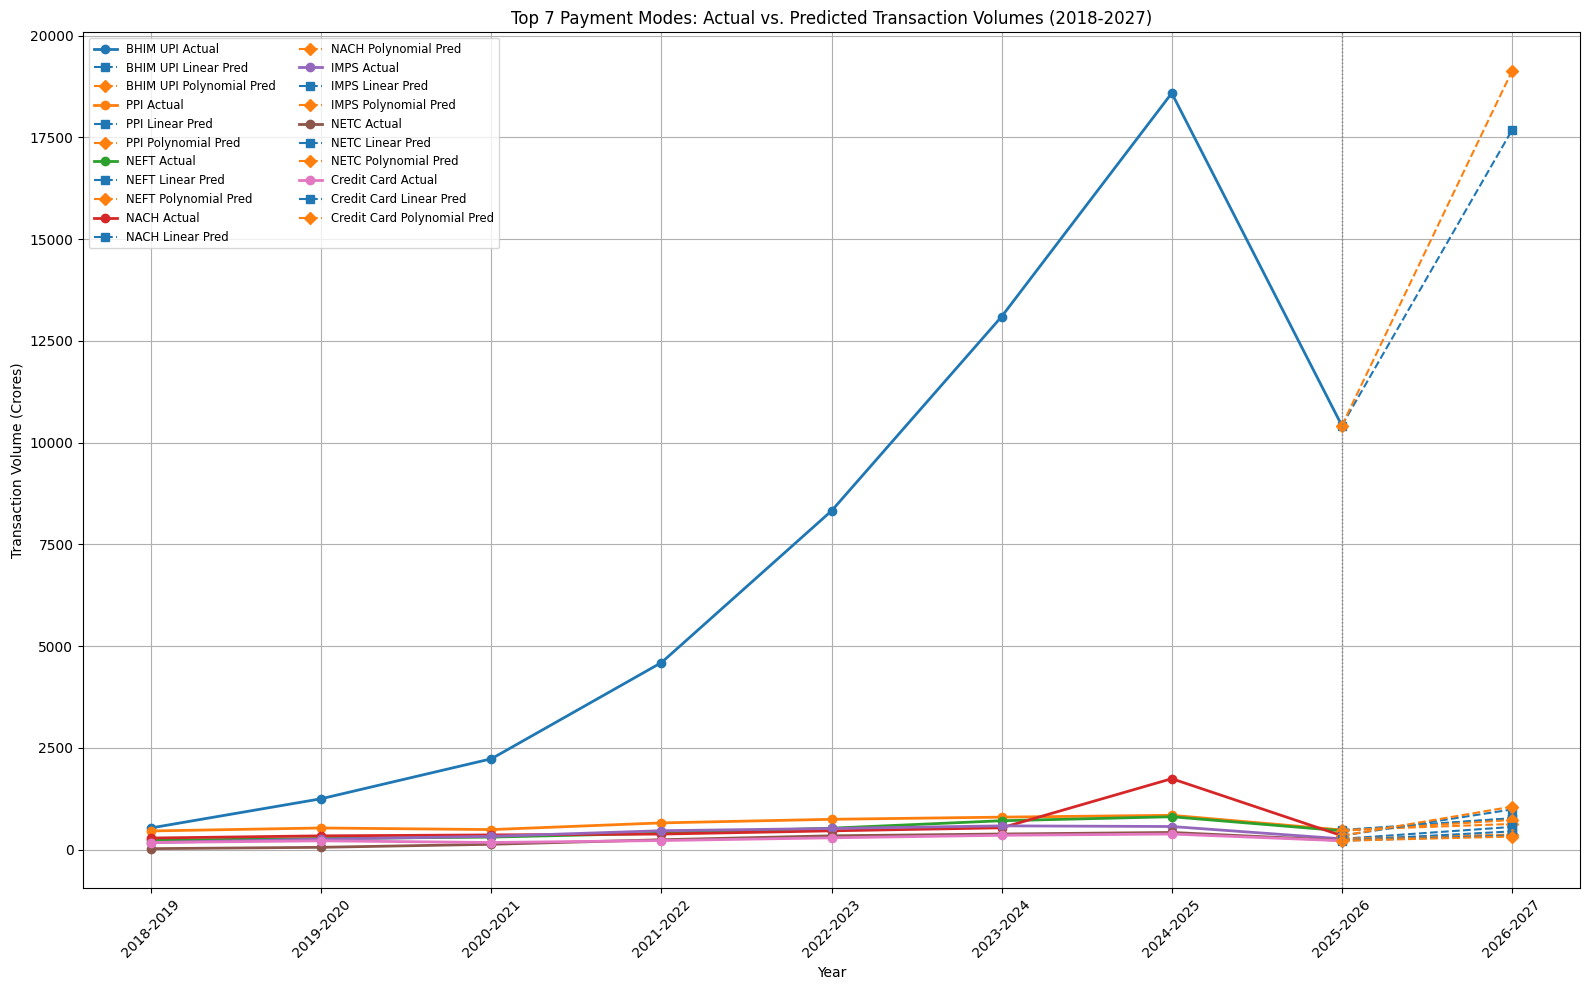

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
df = pd.read_csv('digital_payments_predictions_26_27.csv')

# Select top 7 modes by latest actual year (2025-2026)
top7 = df.sort_values(by='2025-2026', ascending=False).head(7)

# Define years and extended years (for prediction)
years = ['2018-2019', '2019-2020', '2020-2021', '2021-2022', '2022-2023', '2023-2024', '2024-2025', '2025-2026']
extended_years = years + ['2026-2027']

plt.figure(figsize=(16,10))

for _, row in top7.iterrows():
    mode = row['Mode']
    actual = row[years].values.astype(float)
    
    # Prediction values for 2026-2027 by 3 models
    preds = {
        'Linear': row['2026_2027_linear'],
        'Polynomial': row['2026_2027_poly'],
    }
    
    # Plot actual values as solid line with circle markers
    plt.plot(years, actual, marker='o', label=f'{mode} Actual', linewidth=2)
    
    # Plot predictions with dashed lines and unique markers
    marker_map = {'Linear': 's', 'Polynomial': 'D'}
    color_map = {'Linear': 'tab:blue', 'Polynomial': 'tab:orange'}
    
    for pred_name, pred_value in preds.items():
        plt.plot(['2025-2026', '2026-2027'], [actual[-1], pred_value],
                 linestyle='--',
                 marker=marker_map[pred_name],
                 color=color_map[pred_name],
                 label=f'{mode} {pred_name} Pred')
        
# Vertical line to separate actual and predicted
plt.axvline(x='2025-2026', color='gray', linestyle=':', linewidth=1)

plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Transaction Volume (Crores)')
plt.title('Top 7 Payment Modes: Actual vs. Predicted Transaction Volumes (2018-2027)')
plt.legend(fontsize='small', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Load your data
df = pd.read_csv('digital_payments.csv')

# Years used for training (up to 24)
train_years = ['2018-2019','2019-2020','2020-2021','2021-2022','2022-2023','2023-2024']
train_indices = np.arange(len(train_years)).reshape(-1,1)  # 0 to 5

def predict_25_linear(row):
    vals = row[train_years].values.astype(float)
    model = LinearRegression()
    model.fit(train_indices, vals)
    pred = model.predict(np.array([[len(train_years)]]))[0]  # predict at index 6 = year 2024-2025
    return max(0, pred)

def predict_25_poly(row, degree=2):
    vals = row[train_years].values.astype(float)
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(train_indices)
    model = LinearRegression()
    model.fit(X_poly, vals)
    pred_poly = poly.transform(np.array([[len(train_years)]]))
    pred = model.predict(pred_poly)[0]
    return max(0, pred)

# Apply models to predict 2024-2025 (25)
df['2024_2025_linear_pred'] = df.apply(predict_25_linear, axis=1)
df['2024_2025_poly_pred'] = df.apply(predict_25_poly, axis=1)

# Save updated CSV with predictions
df.to_csv('digital_payments_pred_25.csv', index=False)
print("Saved digital_payments_pred_25.csv")


Saved digital_payments_pred_25.csv


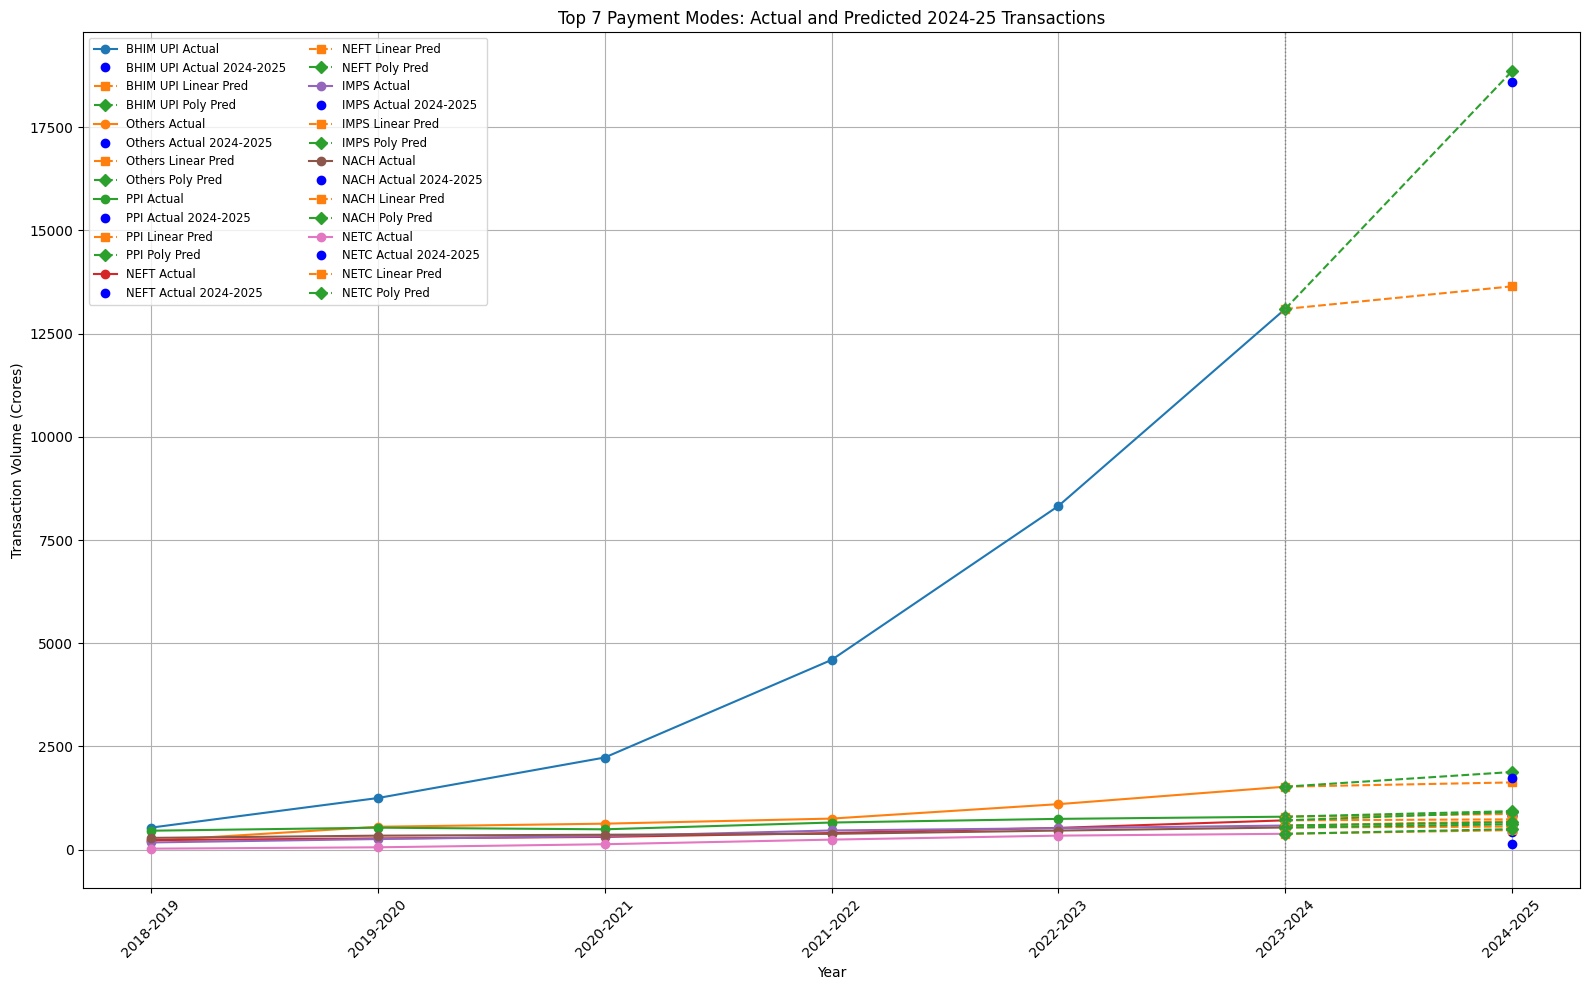

Linear Regression MAE: 1125.53, MSE: 4008069.41
Polynomial Regression MAE: 500.46, MSE: 632204.37
Saved digital_payments_with_25_preds.csv


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load data CSV with yearly volumes, include actual 2024-2025 data
df = pd.read_csv('digital_payments.csv')

# Define training years and prediction year
train_years = ['2018-2019','2019-2020','2020-2021','2021-2022','2022-2023','2023-2024']
pred_year = '2024-2025'

# For models, convert year labels to numeric indices 0..5 for training
X_train = np.arange(len(train_years)).reshape(-1,1)

def linear_predict(row):
    y = row[train_years].values.astype(float)
    model = LinearRegression()
    model.fit(X_train, y)
    pred = model.predict([[len(train_years)]])[0]
    return max(0, pred)

def poly_predict(row, degree=2):
    y = row[train_years].values.astype(float)
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X_train)
    model = LinearRegression()
    model.fit(X_poly, y)
    pred_poly = poly.transform([[len(train_years)]])
    pred = model.predict(pred_poly)[0]
    return max(0, pred)

# Add prediction columns to DataFrame
df['2024_2025_linear_pred'] = df.apply(linear_predict, axis=1)
df['2024_2025_poly_pred'] = df.apply(poly_predict, axis=1)

# Select top 7 modes by 2023-2024 volume for visualization
top7 = df.sort_values(by='2023-2024', ascending=False).head(7)

# Visualize actual vs predicted 2024-2025 volumes
plt.figure(figsize=(16,10))

for _, row in top7.iterrows():
    mode = row['Mode']
    actual_vals = row[train_years + [pred_year]].values.astype(float)

    # Plot actual training series (up to 2023-24)
    plt.plot(train_years, actual_vals[:-1], marker='o', label=f'{mode} Actual')

    # Plot actual 2024-25 as blue dot
    plt.plot([pred_year], [actual_vals[-1]], 'bo', label=f'{mode} Actual {pred_year}')

    # Plot linear prediction dashed line with s marker
    plt.plot([train_years[-1], pred_year], 
             [row['2023-2024'], row['2024_2025_linear_pred']],
             linestyle='--', marker='s', color='tab:orange', label=f'{mode} Linear Pred')

    # Plot polynomial prediction dashed line with D marker
    plt.plot([train_years[-1], pred_year], 
             [row['2023-2024'], row['2024_2025_poly_pred']],
             linestyle='--', marker='D', color='tab:green', label=f'{mode} Poly Pred')

plt.axvline(x='2023-2024', color='gray', linestyle=':', linewidth=1)
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Transaction Volume (Crores)')
plt.title('Top 7 Payment Modes: Actual and Predicted 2024-25 Transactions')
plt.legend(loc='upper left', fontsize='small', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()

# Accuracy metrics for 2024-2025 prediction
true_vals = top7[pred_year].astype(float)
linear_preds = top7['2024_2025_linear_pred'].astype(float)
poly_preds = top7['2024_2025_poly_pred'].astype(float)

mae_linear = mean_absolute_error(true_vals, linear_preds)
mse_linear = mean_squared_error(true_vals, linear_preds)

mae_poly = mean_absolute_error(true_vals, poly_preds)
mse_poly = mean_squared_error(true_vals, poly_preds)

print(f"Linear Regression MAE: {mae_linear:.2f}, MSE: {mse_linear:.2f}")
print(f"Polynomial Regression MAE: {mae_poly:.2f}, MSE: {mse_poly:.2f}")

# Save CSV with predictions
df.to_csv('digital_payments_with_25_preds.csv', index=False)
print("Saved digital_payments_with_25_preds.csv")


In [14]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import joblib
import os

# Load data
df = pd.read_csv('digital_payments.csv')
train_years = ['2018-2019','2019-2020','2020-2021','2021-2022','2022-2023','2023-2024']
X_train = np.arange(len(train_years)).reshape(-1, 1)

# Ensure directory to save models
os.makedirs('models', exist_ok=True)

def train_and_save_models():
    for idx, row in df.iterrows():
        mode = row['Mode']
        y = row[train_years].values.astype(float)
        
        # Linear regression
        lin_model = LinearRegression()
        lin_model.fit(X_train, y)
        joblib.dump(lin_model, f"models/{mode}_linear.pkl")
        
        # Polynomial regression
        poly = PolynomialFeatures(degree=2)
        X_poly = poly.fit_transform(X_train)
        poly_model = LinearRegression()
        poly_model.fit(X_poly, y)
        # Save both the PolynomialFeatures and the model for proper prediction later
        joblib.dump(poly, f"models/{mode}_poly_features.pkl")
        joblib.dump(poly_model, f"models/{mode}_poly.pkl")
        
        print(f"Saved models for {mode}")

train_and_save_models()


Saved models for BHIM UPI
Saved models for PPI
Saved models for Debit Card
Saved models for NACH
Saved models for NEFT
Saved models for Others
Saved models for Credit Card
Saved models for IMPS
Saved models for AEPS
Saved models for Internet Banking
Saved models for Closed Loop Wallet
Saved models for Mobile Banking
Saved models for NETC
Saved models for RTGS
Saved models for BHIM Aadhaar
Saved models for USSD
